In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares
import pandas as pd

In [12]:
df = pd.read_csv('data/circle_data.csv')
x = df['x'].values
y = df['y'].values
print(x.max(), x.min())

5.260952987346921 -5.19194428299987


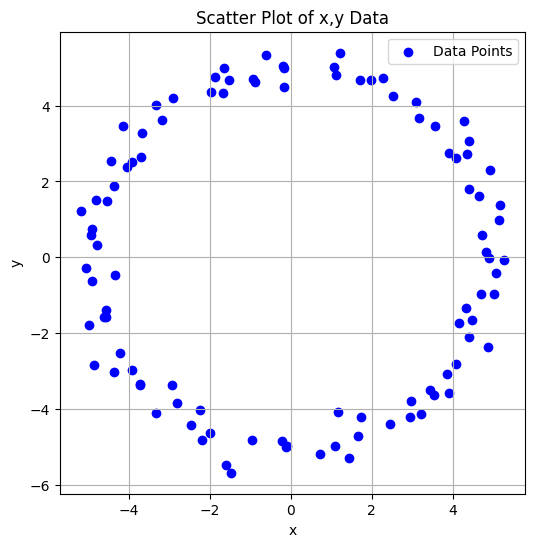

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(x, y, label="Data Points", color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x,y Data")
plt.legend()
plt.grid(True)
plt.show()

Estimated Center: [ 0.0258482  -0.01402069]
Estimated Radius: 5.003319499771711


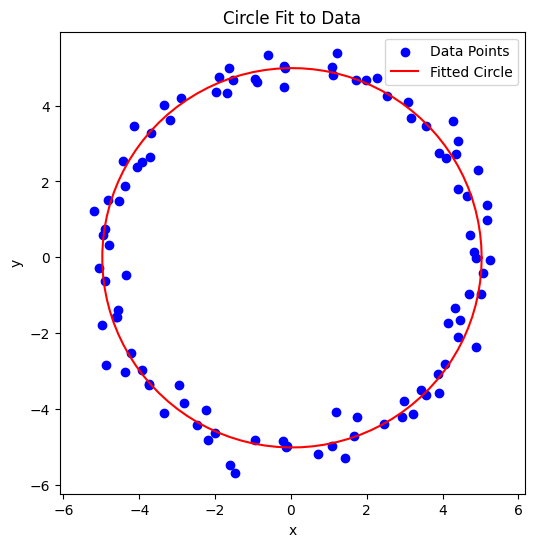

In [ ]:
# finding radius of circle distance between points and center
def calc_R(x, y, center):
    return np.sqrt((x - center[0])**2 + (y - center[1])**2)

# define a residuals function for optimization:
def residuals(center, x, y):
    Ri = calc_R(x, y, center)
    return Ri - Ri.mean()

center_estimate = (np.mean(x), np.mean(y))
result = least_squares(residuals, center_estimate, args=(x, y))
center_estimated = result.x
radius_estimated = calc_R(x, y, center_estimated).mean()

print("Estimated Center:", center_estimated)
print("Estimated Radius:", radius_estimated)

theta_fit = np.linspace(0, 2*np.pi, 100)
x_fit = center_estimated[0] + radius_estimated * np.cos(theta_fit)
y_fit = center_estimated[1] + radius_estimated * np.sin(theta_fit)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, label='Data Points', color='blue')
plt.plot(x_fit, y_fit, label='Fitted Circle', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circle Fit to Data')
plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
from IPython.display import display, Math

a = center_estimated[0]  # Estimated center x-coordinate
b = center_estimated[1]  # Estimated center y-coordinate
r = radius_estimated     # Estimated radius

# Calculate the x bounds:
x_lower = a - r
x_upper = a + r

# Create a LaTeX-formatted string for the upper semicircle equation:
# Upper semicircle: y = sqrt(r^2 - (x - a)^2) + b
equation = f"y = \\sqrt{{{r**2:.3f} - (x - ({a:.3f}))^2}} + ({b:.3f})"
x_bounds = f"x \\in [{x_lower:.3f},\\ {x_upper:.3f}]"

# Display the equation with x bounds:
display(Math(equation + ",\\quad " + x_bounds))


<IPython.core.display.Math object>